# Summary
**Goal:**
To predict the price of a house using their respective features.

**My Notes**

Doing RandomForest will give you the best score
but you will not be able to learn anything new.
Doing this dataset by using Linear Regression
and fine-tuning it with Ridge, will enable you
to learn how to tweak your model
and come up with creative features.

It is inevitable.
The longer you stare at the dataset,
heatmap, or graph, the more your brain
will see patterns that you did not see before.
That is when you will start exploring new features.
That is when your score will improve.
Even if the score does not improve, as long as you
discover something new about the dataset,
then you have done your job for the day.
Remember, your brain is the utlimate tool.
It is what we are investing time on.

**Quick Reminders**

1. **Be comfortable with features.**
This is where you should be spending the time the most.
It is where you should develop an intuition
where you command how features are drawn.

2. **Unpack Residual Analysis.**
You get to see the points in the scatter plot
of those that deviates from the prediction.
You should be able to isolate them and
see why predictions are off.

3. **Take Advantage of Visualization.**
A machine can learn well through tabular data.
A human brain can see patterns by seeing.
Give yourself permission to do a graph.
Not for others, not for your machine
but for you to see the data for yourself.

4. **Practice Simple Explaining.**
The more you deconstruct complicated matters
into simple terms,
the more you get to understand the topic fully.
Commit to the dataset. Be a real estate agent.
At least for the time your are working on this dataset.

5. **Enjoy Writing in Markdown.**
Part of the scientific process is to take notes. 
Keep writing your thoughts.
Write down your obsevations,
Ask questions, experiment to find out
and then make your conclusions.
I learned that from Avatar the movie.







































## What I know so far
**Iteration 9.**
I added all Sqaure Foot numeric values to a
Total Square foot feature.
This excluded the SF of Basement, which as its
own stuff going on.
Also, multiplied the 'BsmtFinType1' * 'BsmtFinSF1'
after encoding the former into numeric.
I figured the higher the rating, should be the product
of the area size.

**Iteration 8.**
Added _garage_fit and _room_size.
I was looking at the heatmap,
Not all garage have the same sizes
in relation to the number of cars.
I figured that the some houses have bigger spaces
for thier cars than others.
Bigger cars = Bigger houses.
Also, I saw that check the area of the "other rooms"
Bigger "other rooms" = Bigger houses.

**Iteration 7.**
Added _others_rooms as feature that counts the rooms
that are not bedrooms.
Also, added a ratio of bedrooms vs non-bedrooms.

**Iteration 6.**
Added all the categorical text features.
Removed some numerical features that had low correlation
to the target.
The linear regression improved but there are still some outliers.
Ridge training improved but test is way off. Overfitting.

**Iteration 5.**
I have started to integrate the text categorical features.
Starting with Neighboorhood.
The test score improved at the sacrifice of the training score.

**Iteration 4.**
I understand that linear regression (LR) is doing way worst
in fitting the points.
The there seems to be some points that are large outliers
when LR is used for prediction.
When I use Ridge, the model generalizes it better and 
the outliers does not pull the model in giving out
weird predictions.

**Iteration 3.**
RandomForest still wins.
This version, I have adjusted the pipeline to transform
the features into a polynomial, scaled it.
When comparing predictions and true sale prices,
the relationship seems to bend upwards.
Doing polynomial, keeps the line straight.
Need to scale it because of ridge.
I also looked at some categorical that had some sort of order
with them. I just replaced them with numeric and added them
in the pipeline.

**Iteration 2.**
Blindly adding all Categorical features.
There are some categorical that are in training
but are not in testing.
So, I just kept running the pipeline and removing
problamatic categorical features until it worked.
This improved the score.

**Iteration 1.**
Blindly added all numerical features only.
Nothing fancy. Just wanted to have a baseline.

## Scoring Versions
    9. Total Square Area and Basement Type 1 Area according to rating.
    model_base 788159.3767695272 78311.64321697115
    model_tune 36029.171224016485 99856.38692924702
    
    8. Added _garage_fit and _room_size.
    model_base 109493.8271928349 60679.54856646659
    model_tune 39825.388732699044 97956.2313822883
    
    7. Added _other_rooms and _beds_ratio features.
    model_base 76391.57430733932 76213.62887190148
    model_tune 38149.485803033094 97213.2761817984
    
    6. Added all categorical text and remove some numeric features.
    model_base 84983.2018852683 72844.30233778527
    model_tune 40442.100924493134 97565.43554013727
    
    5. Added Neighborhood as categorical feature.
    model_base 1.2693973681523494e+16 50537.44091875372
    model_tune 56743.66686444727 51401.579084512516
    
    4. Linear Regression and Ridge.
    model_base 1.4488670555416282e+16 54538.32600176213
    model_tune 54124.36066008286 55844.18222280358
    
    3. Encoded categorical that are ordered. RandomForest
    model_base 29581.92123767121 45637.69717668411
    model_tune 28454.07259678302 44573.59896205597
    
    2. Include Categorical. RandomForest
    model_base 29761.712624668104 45622.31938365163
    model_tune 30398.282498063614 46175.65530935336
    
    1. Baseline. numeric only. RandomForest
    model_base 30027.52817329832 44130.043234907316
    model_tune 29193.731684252467 44415.39678678987

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None  

df = pd.read_csv('kaggle/input/house-prices-advanced-regression-techniques/train.csv')

num = [x for x in df.columns if df.dtypes[x] in ('int64', 'float')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
target = 'SalePrice'
num.remove(target)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=0)

# Explore

In [8]:
corr = train.corr(numeric_only=True)
corr[target].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
TotalBsmtSF      0.635535
1stFlrSF         0.620740
FullBath         0.578134
TotRmsAbvGrd     0.542658
YearBuilt        0.521242
YearRemodAdd     0.517822
GarageYrBlt      0.494154
MasVnrArea       0.493482
Fireplaces       0.470320
BsmtFinSF1       0.401390
LotFrontage      0.360274
OpenPorchSF      0.320193
2ndFlrSF         0.320141
WoodDeckSF       0.311813
HalfBath         0.283762
LotArea          0.252766
BsmtFullBath     0.226432
BsmtUnfSF        0.206736
BedroomAbvGr     0.182258
ScreenPorch      0.096740
3SsnPorch        0.057561
MoSold           0.041369
PoolArea         0.027441
BsmtHalfBath    -0.010994
Id              -0.017389
BsmtFinSF2      -0.020622
LowQualFinSF    -0.023128
MiscVal         -0.024750
YrSold          -0.045628
OverallCond     -0.053643
MSSubClass      -0.084312
EnclosedPorch   -0.129519
KitchenAbvGr    -0.136104
Name: SalePr

## Target

count      1168.000000
mean     180808.898973
std       78499.911304
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64


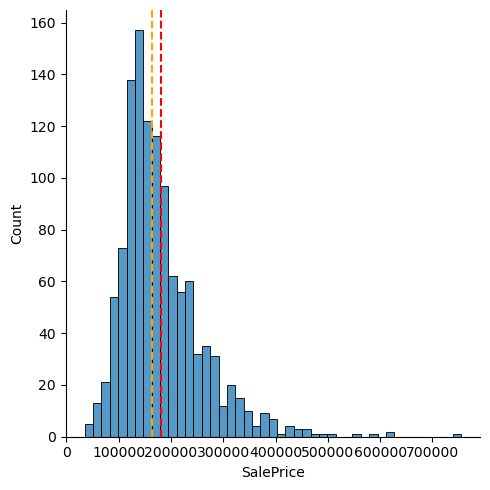

In [9]:
g = sns.FacetGrid(train[target], height=5)
g.map_dataframe(sns.histplot);
g.refline(x=train[target].mean(), color='red');
g.refline(x=train[target].median(), color='orange');
print(train[target].describe())

In [38]:
train.loc[train[target]<50000].T

533      30       495      916      968
Id                 534       31      496      917      969
MSSubClass          20       70       30       20       50
MSZoning            RL  C (all)  C (all)  C (all)       RM
LotFrontage       50.0     50.0     60.0     50.0     50.0
LotArea           5000     8500     7879     9000     5925
Street            Pave     Pave     Pave     Pave     Pave
Alley              NaN     Pave      NaN      NaN      NaN
LotShape           Reg      Reg      Reg      Reg      Reg
LandContour        Low      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside   Inside   Inside   Inside   Inside
LandSlope          Mod      Gtl      Gtl      Gtl      Gtl
Neighborhood   BrkSide   IDOTRR   IDOTRR   IDOTRR  OldTown
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam
HouseStyle      1Story   2Story   1Story   1Story   1.5Fin
OverallQual          1        4        4        2        3
OverallCond          3        4        5        3        6
YearBuilt         1946     1920     1920     1949     1910
YearRemodAdd      1950     1950     1950     1950     1950
RoofStyle        Gable  Gambrel    Gable    Gable    Gable
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior1st    VinylSd  BrkFace  Wd Sdng  AsbShng  VinylSd
Exterior2nd    VinylSd  BrkFace  Wd Sdng  AsbShng  VinylSd
MasVnrType        None     None     None     None     None
MasVnrArea         0.0      0.0      0.0      0.0      0.0
ExterQual           Fa       TA       TA       TA       TA
ExterCond           Fa       Fa       TA       TA       TA
Foundation        Slab   BrkTil   CBlock   CBlock   BrkTil
BsmtQual           NaN       TA       TA       TA       TA
BsmtCond           NaN       TA       TA       TA       TA
BsmtExposure       NaN       No       No       Av       No
BsmtFinType1       NaN      Unf      Rec      BLQ      Unf
BsmtFinSF1           0        0      495       50        0
BsmtFinType2       NaN      Unf      Unf      Unf      Unf
BsmtFinSF2           0        0        0        0        0
BsmtUnfSF            0      649      225      430      600
TotalBsmtSF          0      649      720      480      600
Heating           GasA     GasA     GasA     GasA     Grav
HeatingQC           Fa       TA       TA       TA       Fa
CentralAir           N        N        N        N        N
Electrical       FuseF    SBrkr    FuseA    FuseA    SBrkr
1stFlrSF           334      649      720      480      600
2ndFlrSF             0      668        0        0      368
LowQualFinSF         0        0        0        0        0
GrLivArea          334     1317      720      480      968
BsmtFullBath         0        0        0        1        0
BsmtHalfBath         0        0        0        0        0
FullBath             1        1        1        0        1
HalfBath             0        0        0        0        0
BedroomAbvGr         1        3        2        1        2
KitchenAbvGr         1        1        1        1        1
KitchenQual         Fa       TA       TA       TA       TA
TotRmsAbvGrd         2        6        4        4        6
Functional         Typ      Typ      Typ      Typ      Typ
Fireplaces           0        0        0        0        0
FireplaceQu        NaN      NaN      NaN      NaN      NaN
GarageType         NaN   Detchd      NaN   Detchd      NaN
GarageYrBlt        NaN   1920.0      NaN   1958.0      NaN
GarageFinish       NaN      Unf      NaN      Unf      NaN
GarageCars           0        1        0        1        0
GarageArea           0      250        0      308        0
GarageQual         NaN       TA      NaN       TA      NaN
GarageCond         NaN       Fa      NaN       TA      NaN
PavedDrive           N        N        N        Y        Y
WoodDeckSF           0        0        0        0        0
OpenPor

In [34]:
train.loc[train[target]>500000].T

898      1169     1046     178      691      803 
Id                 899     1170     1047      179      692      804
MSSubClass          20       60       60       20       60       60
MSZoning            RL       RL       RL       RL       RL       RL
LotFrontage      100.0    118.0     85.0     63.0    104.0    107.0
LotArea          12919    35760    16056    17423    21535    13891
Street            Pave     Pave     Pave     Pave     Pave     Pave
Alley              NaN      NaN      NaN      NaN      NaN      NaN
LotShape           IR1      IR1      IR1      IR1      IR1      Reg
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside  CulDSac   Inside  CulDSac   Corner   Inside
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   NridgHt  NoRidge  StoneBr  StoneBr  NoRidge  NridgHt
Condition1        Norm     Norm     Norm     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam     1Fam
HouseStyle      1Story   2Story   2Story   1Story   2Story   2Story
OverallQual          9       10        9        9       10        9
OverallCond          5        5        5        5        6        5
YearBuilt         2009     1995     2005     2008     1994     2008
YearRemodAdd      2010     1996     2006     2009     1995     2009
RoofStyle          Hip      Hip      Hip      Hip    Gable      Hip
RoofMatl       CompShg  CompShg  CompShg  CompShg  WdShngl  CompShg
Exterior1st    VinylSd  HdBoard  CemntBd  VinylSd  HdBoard  VinylSd
Exterior2nd    VinylSd  HdBoard  CmentBd  VinylSd  HdBoard  VinylSd
MasVnrType       Stone  BrkFace    Stone    Stone  BrkFace    Stone
MasVnrArea       760.0   1378.0    208.0    748.0   1170.0    424.0
ExterQual           Ex       Gd       Gd       Ex       Ex       Ex
ExterCond           TA       Gd       TA       TA       TA       TA
Foundation       PConc    PConc    PConc    PConc    PConc    PConc
BsmtQual            Ex       Ex       Ex       Ex       Ex       Ex
BsmtCond            TA       TA       TA       TA       TA       TA
BsmtExposure        Gd       Gd       Av       No       Gd       Gd
BsmtFinType1       GLQ      GLQ      GLQ      GLQ      GLQ      Unf
BsmtFinSF1        2188     1387      240     1904     1455        0
BsmtFinType2       Unf      Unf      Unf      Unf      Unf      Unf
BsmtFinSF2           0        0        0        0        0        0
BsmtUnfSF          142      543     1752      312      989     1734
TotalBsmtSF       2330     1930     1992     2216     2444     1734
Heating           GasA     GasA     GasA     GasA     GasA     GasA
HeatingQC           Ex       Ex       Ex       Ex       Ex       Ex
CentralAir           Y        Y        Y        Y        Y        Y
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
1stFlrSF          2364     1831     1992     2234     2444     1734
2ndFlrSF             0     1796      876        0     1872     1088
LowQualFinSF         0        0        0        0        0        0
GrLivArea         2364     3627     2868     2234     4316     2822
BsmtFullBath         1        1        0        1        0        0
BsmtHalfBath         0        0        0        0        1        0
FullBath             2        3        3        2        3        3
HalfBath             1        1        1        0        1        1
BedroomAbvGr         2        4        4        1        4        4
KitchenAbvGr         1        1        1        1        1        1
KitchenQual         Ex       Gd       Ex       Ex       Ex       Ex
TotRmsAbvGrd        11       10       11        9       10       12
Functional         Typ      Typ      Typ      Typ      Typ      Typ
Fireplaces           2        1        1        1        2        1
FireplaceQu         Gd       TA       Gd       Gd       Ex       Gd
Garage

## Features

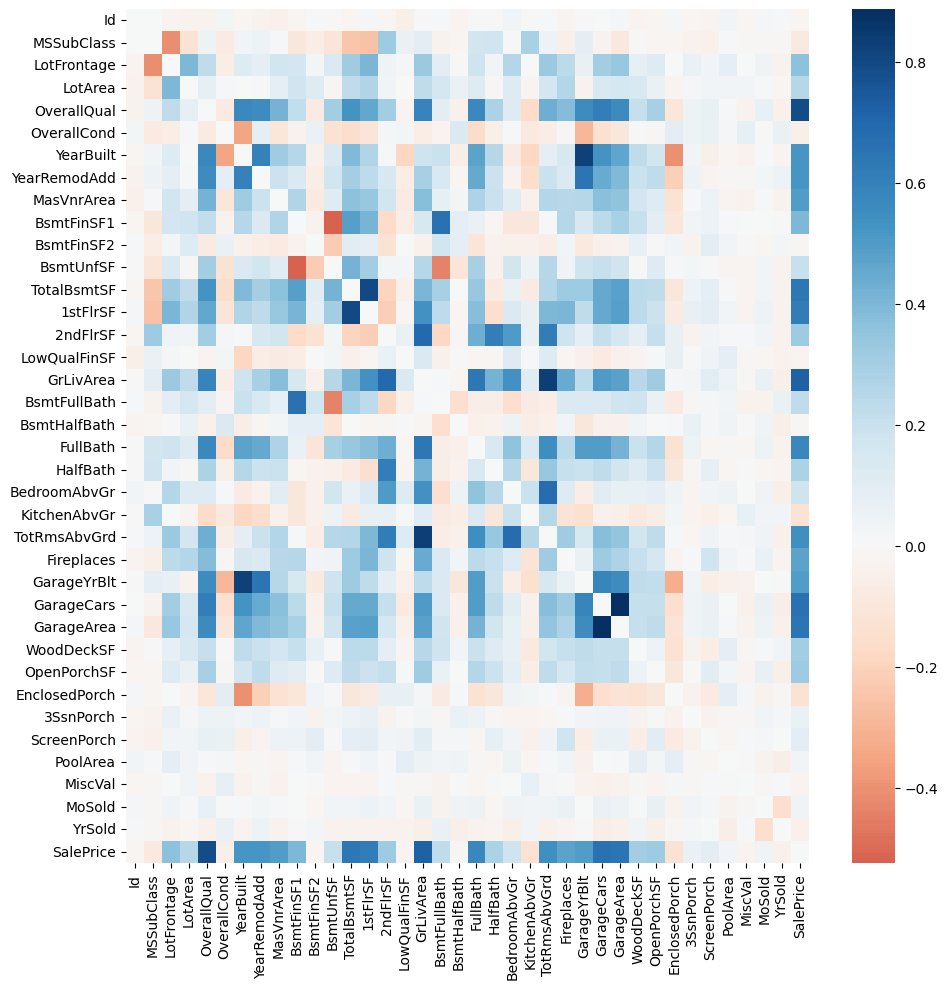

In [39]:
np.fill_diagonal(corr.values, 0)
g = sns.FacetGrid(corr, height=10)
g.map_dataframe(sns.heatmap, cmap='RdBu', center=0);

In [12]:
np.array(num)

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype='<U13')

In [13]:
[x for x in num if 'SF' in x]

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [14]:
train['_total_SF'] = train[[
#     'BsmtFinSF1',
#  'BsmtFinSF2',
#  'BsmtUnfSF',
#  'LowQualFinSF',
    
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF']].sum(axis=1)

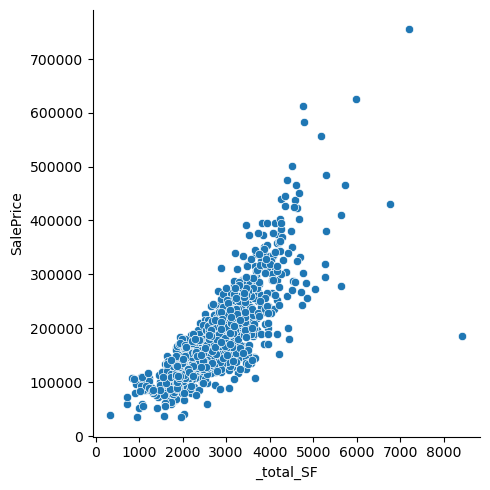

In [15]:
sns.relplot(train, x='_total_SF', y=target)

In [16]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

SalePrice        1.000000
_total_SF        0.821233
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
TotalBsmtSF      0.635535
1stFlrSF         0.620740
FullBath         0.578134
TotRmsAbvGrd     0.542658
YearBuilt        0.521242
YearRemodAdd     0.517822
GarageYrBlt      0.494154
MasVnrArea       0.493482
Fireplaces       0.470320
BsmtFinSF1       0.401390
LotFrontage      0.360274
OpenPorchSF      0.320193
2ndFlrSF         0.320141
WoodDeckSF       0.311813
HalfBath         0.283762
LotArea          0.252766
BsmtFullBath     0.226432
BsmtUnfSF        0.206736
BedroomAbvGr     0.182258
ScreenPorch      0.096740
3SsnPorch        0.057561
MoSold           0.041369
PoolArea         0.027441
BsmtHalfBath    -0.010994
Id              -0.017389
BsmtFinSF2      -0.020622
LowQualFinSF    -0.023128
MiscVal         -0.024750
YrSold          -0.045628
OverallCond     -0.053643
MSSubClass      -0.084312
EnclosedPorch   -0.129519
KitchenAbvGr

## BsmtFinType1 and BsmtFinSF1

In [17]:
train['BsmtFinSF1']

618       48
870        0
92       713
817     1218
302        0
        ... 
763     1163
835      442
1216       0
559        0
684        0
Name: BsmtFinSF1, Length: 1168, dtype: int64

In [18]:
train['_bsmt_type1'] = train['BsmtFinType1'].map({
    'GLQ':5
    ,'ALQ':4
    ,'BLQ':3
    ,'Rec':2
    ,'LWQ':1
    ,'Unf':0
}).fillna(0) * train['BsmtFinSF1']#- train['BsmtUnfSF'] - train['LowQualFinSF']

#     'BsmtFinSF1',
#  'BsmtFinSF2',
#  'BsmtUnfSF',
#  'LowQualFinSF',

In [19]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

SalePrice        1.000000
_total_SF        0.821233
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
TotalBsmtSF      0.635535
1stFlrSF         0.620740
FullBath         0.578134
TotRmsAbvGrd     0.542658
YearBuilt        0.521242
YearRemodAdd     0.517822
GarageYrBlt      0.494154
MasVnrArea       0.493482
_bsmt_type1      0.490939
Fireplaces       0.470320
BsmtFinSF1       0.401390
LotFrontage      0.360274
OpenPorchSF      0.320193
2ndFlrSF         0.320141
WoodDeckSF       0.311813
HalfBath         0.283762
LotArea          0.252766
BsmtFullBath     0.226432
BsmtUnfSF        0.206736
BedroomAbvGr     0.182258
ScreenPorch      0.096740
3SsnPorch        0.057561
MoSold           0.041369
PoolArea         0.027441
BsmtHalfBath    -0.010994
Id              -0.017389
BsmtFinSF2      -0.020622
LowQualFinSF    -0.023128
MiscVal         -0.024750
YrSold          -0.045628
OverallCond     -0.053643
MSSubClass      -0.084312
EnclosedPorc

# Pipeline

In [291]:
num_pk = [x for x in num if x not in 
          [
              'ScreenPorch', '3SsnPorch', 'MoSold', 'PoolArea', 'BsmtHalfBath'
              , 'Id', 'BsmtFinSF2', 'LowQualFinSF' , 'MiscVal'
              , 'YrSold', 'OverallCond'
              , 'MSSubClass'
          ]
         ]

In [292]:
cat_pk = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'GarageFinish',
    'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

In [293]:
ord_pk = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond'
          , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
          , 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
blu = {
    'ExterQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'ExterCond': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'BsmtQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'BsmtCond': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'BsmtExposure': {'key': ['Gd','Av','Mn','No'], 'val': [3,2,1,0]}
    , 'BsmtFinType1': {'key': ['GLQ','ALQ','BLQ','Rec','LWQ','Unf'], 'val': [5,4,3,2,1,0]}
    , 'BsmtFinType2': {'key': ['GLQ','ALQ','BLQ','Rec','LWQ','Unf'], 'val': [5,4,3,2,1,0]}
    , 'HeatingQC': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'KitchenQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'FireplaceQu': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'GarageQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'GarageCond': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'PoolQC': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
}

In [294]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [295]:
class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]
    
class CustomEncode(BaseEstimator, TransformerMixin):
    def __init__(self, led):
        self.led = led
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for itm in self.led:
            X[itm] = X[itm].map({
                x:y for x,y in zip(self.led[itm]['key']
                                   , self.led[itm]['val'])})
        return X
    
class EngineerFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        frame = pd.DataFrame({
            '_other_rooms': X['TotRmsAbvGrd'] - X['BedroomAbvGr']
            ,'_beds_ratio': (X['TotRmsAbvGrd'] - X['BedroomAbvGr']) / X['TotRmsAbvGrd']
            , '_garage_fit': X['GarageArea'] * X['GarageCars']
            , '_rooms_size': X['GrLivArea'] * (X['TotRmsAbvGrd'] - X['BedroomAbvGr'] - X['KitchenAbvGr'])
            , '_total_SF': X[
                ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'
                 , 'WoodDeckSF', 'OpenPorchSF']
            ].sum(axis=1)
#             , '_bsmt_type1': X['BsmtFinType1'] * X['BsmtFinSF1']
        })
        
        return pd.concat([X, frame], axis=1)

In [296]:
num_pp = Pipeline([
    ('dataselect', DataSelect(num_pk+ord_pk))
    , ('customencode', CustomEncode(blu))
    , ('engineer', EngineerFeature())
    , ('impute', SimpleImputer(strategy='median'))
    , ('poly', PolynomialFeatures(3))
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(cat_pk))
    , ('impute', SimpleImputer(strategy='constant'))
    , ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
pipe = FeatureUnion([
    ('numeric', num_pp)
    ,('cat_text', cat_pp)
])

In [297]:
pipe.fit(train)
train_pre = pipe.transform(train)
test_pre = pipe.transform(test)

# Model

In [298]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [299]:
lin_reg = LinearRegression()
lin_reg.fit(train_pre, train[target])
print(np.sqrt(-cross_val_score(lin_reg, train_pre, train[target], scoring='neg_mean_squared_error').mean()))
model_base = lin_reg

57820224194.70298


In [300]:
rid_reg = Ridge(100)
rid_reg.fit(train_pre, train[target])
print(np.sqrt(-cross_val_score(rid_reg, train_pre, train[target], scoring='neg_mean_squared_error').mean()))
model_tune = rid_reg

43733.164283323116


# Validation

In [301]:
print('model_base'
, np.sqrt(-cross_val_score(model_base, train_pre, train[target], scoring='neg_mean_squared_error').mean())
, np.sqrt(-cross_val_score(model_base, test_pre, test[target], scoring='neg_mean_squared_error').mean())
)

print('model_tune'
, np.sqrt(-cross_val_score(model_tune, train_pre, train[target], scoring='neg_mean_squared_error').mean())
, np.sqrt(-cross_val_score(model_tune, test_pre, test[target], scoring='neg_mean_squared_error').mean())
)

model_base 57820224194.70298 102589.5085811029
model_tune 43733.164283323116 110187.50764982229


# Submission

In [302]:
samp = pd.read_csv('kaggle/input/house-prices-advanced-regression-techniques/test.csv')
pd.DataFrame({
    'Id': samp['Id']
    , 'SalePrice': model_tune.predict(pipe.transform(samp))
}).to_csv('submission.csv', index=False)

# Residual Analysis

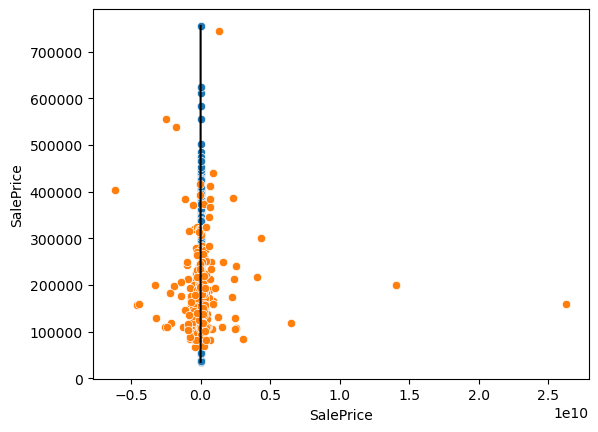

In [303]:
X = model_base.predict(train_pre)
Y = train[target]
Xhat = model_base.predict(test_pre)
Yhat = test[target]
sns.scatterplot(x=X, y=Y);
sns.scatterplot(x=Xhat, y=Yhat);
sns.lineplot(x=Y, y=Y, color='black');

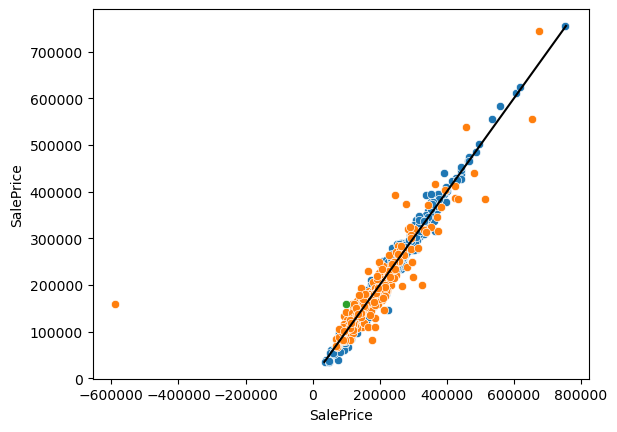

In [304]:
X = model_tune.predict(train_pre)
Y = train[target]
Xhat = model_tune.predict(test_pre)
Yhat = test[target]
sns.scatterplot(x=X, y=Y);
sns.scatterplot(x=Xhat, y=Yhat);
sns.lineplot(x=Y, y=Y, color='black');
sns.scatterplot(x=[100483.45416], y=[160000.000000]);

In [305]:
Yhat[1298]

160000

In [306]:
pd.DataFrame({
    'true': Yhat
    , 'predictions': Xhat
}).loc[1298]

true           160000.000000
predictions   -588885.185447
Name: 1298, dtype: float64

In [307]:
test['BsmtFinSF1'].describe()

count     292.000000
mean      458.636986
std       532.429559
min         0.000000
25%         0.000000
50%       395.500000
75%       699.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [308]:
test.loc[1298]

Id                  1299
MSSubClass            60
MSZoning              RL
LotFrontage        313.0
LotArea            63887
Street              Pave
Alley                NaN
LotShape             IR3
LandContour          Bnk
Utilities         AllPub
LotConfig         Corner
LandSlope            Gtl
Neighborhood     Edwards
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual           10
OverallCond            5
YearBuilt           2008
YearRemodAdd        2008
RoofStyle            Hip
RoofMatl         ClyTile
Exterior1st       Stucco
Exterior2nd       Stucco
MasVnrType         Stone
MasVnrArea         796.0
ExterQual             Ex
ExterCond             TA
Foundation         PConc
BsmtQual              Ex
BsmtCond              TA
BsmtExposure          Gd
BsmtFinType1         GLQ
BsmtFinSF1          5644
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            466
TotalBsmtSF         6110
Heating             GasA
